In [2]:
import numpy as np
import pandas as pd
import random as rnd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [165]:
df=pd.read_csv('regLinPoli.csv')
df.head()


,X,X2,X3,X4,X5,y
0,7.317938,53.552216,0.864389,0.859736,114,50.552216
1,1.284357,1.649574,0.108686,0.959256,115,2.649574
2,97.740652,9553.235089,1.990075,-0.344100,116,9643.235089
3,17.753591,315.190006,1.249286,-0.889370,117,310.190006
4,66.441081,4414.417290,1.822437,-0.450777,118,4390.417290


In [336]:
X=np.array(df.iloc[:,0:5]) 
y=np.array(df.iloc[:,5])

In [355]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.95,random_state=101)

**estandarizacion**

In [356]:
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

m=np.mean(y_train)
sd=np.std(y_train)
y_train=(y_train-m)/sd
y_test=(y_test-m)/sd

**funcion de estimación**

In [8]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

**regularización por renglón**    

In [9]:
def regularizado(w,x,y,lam,eta):

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - sal
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*X_train[i,j] - lam*w[j+1]
        
    return w

**Error con $\lambda=0$ y $\eta=0.05$**

In [403]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

0.021645066501152558

**Error con $\lambda=0.01$ y $\eta=0.05$**

In [404]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0.01,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

0.0732881077427395

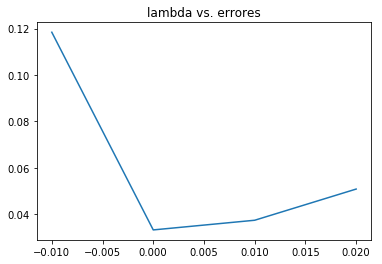

In [406]:
import random as rnd
lam = np.arange(-0.01,0.03,0.01)
error_lambda = []

for l in range(lam.size):
    w= [rnd.random() for i in range(X_train.shape[1]+1)]

    w =regularizado(w,X_train,y_train,lam[l],0.05)
    error_lambda = error_lambda + [np.mean((y_test - (w[0]+ np.dot(X_test,w[1:len(w)])))**2)]
    
plt.plot(lam,error_lambda)
plt.title('lambda vs. errores')

# MINIBATCH

**Calculamos las w's por bloques de datos y no por renglones**

In [43]:
def agregar_unos(m):
    unos = np.array([np.ones(m.shape[0])])
    return np.concatenate((unos.T,m),axis=1)

**Regularización para 1 bloque de datos(Pudieran ser todos)**

In [44]:
def wreg(w,x,y,eta,lamb):
    #w=np.ones(len(np.transpose(x))+1)
    error=np.array([]) 
    w0=np.array([]) 
    w1=np.array([])
    while (np.sum((y - np.dot(w,agregar_unos(x).T))))**2 > 0.01:
        error=np.append(error,(np.sum((y - np.dot(w,agregar_unos(x).T))))**2) 
        w0=np.append(w0,w[0]) 
        w1=np.append(w1,w[1])
        #print(w[0],w[1])
        res=y-np.dot(w,agregar_unos(x).T) 
        w[0]= w[0] + (eta * np.sum(res)/len(y)) 
        for i in (range(len(x.T))):
            w[i+1]=w[i+1]+eta*np.sum(res*agregar_unos(x)[:,i+1])/len(y)-lamb*w[i+1]
        error2=np.mean((np.dot(w,agregar_unos(x).T) - y_train)**2)
    return w,error2

#w,error2=wreg(X_train,y_train,0.05,0) 

**Para $\lambda=0$**

In [416]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0) 
print(w,error)
np.mean((np.dot(w,agregar_unos(X_test).T) - y_test)**2)

[0.0019525560643993457, 0.28657684330307481, 0.59352936003882928, 0.11188614748424267, 0.024347631946547561, 0.037193819956426295] 0.0236125150989


0.029850280573390342

**Para $\lambda=0.01$**

In [417]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0.01) 
print(w,error)
np.mean((np.dot(w,agregar_unos(X_test).T) - y_test)**2)

[0.0019437790462334518, 0.37285788366172556, 0.48390161904912254, 0.060098397394792412, 0.012498848228228172, 0.029985076460840351] 0.0317670291215


0.044527035952713075


# CON REGLINPOLI2

In [4]:
df=pd.read_csv('regLinPoli2.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,153.782162,23648.953370,2.186906,0.155247,16,-153.782162,-23648.95337,-2.186906,-0.155247,-909.534012,...,272,-1856,1390,-4293,4171,-3493,-290,-1017,9,2.033960e+15
1,645.991251,417304.697100,2.810227,-0.923396,35,-153.782162,-23648.95337,-2.810227,0.923396,343.752475,...,-265,-3587,-2479,-1284,-2127,2369,2657,-1481,-150,4.694470e+19
2,-412.060457,169793.820200,2.614961,0.489764,-25,-153.782162,-23648.95337,-2.614961,-0.489764,-776.331121,...,9,4104,-4634,-1637,-4228,527,-1773,-1676,67,-2.017100e+18
3,35.884351,1287.686648,1.554905,-0.970388,-75,-153.782162,-23648.95337,-1.554905,0.970388,696.736200,...,-215,749,-3645,-3202,-1173,-3248,1888,1295,-49,7.629161e+10
4,-85.073496,7237.499779,1.929794,0.247883,44,-153.782162,-23648.95337,-1.929794,-0.247883,-527.805076,...,-360,2150,507,-1972,-7497,-2427,4368,670,43,-3.225260e+13


In [5]:
X=np.array(df.iloc[:,0:38]) 
y=np.array(df.iloc[:,38])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

**ESTANDARIZACION**

In [7]:
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

m=np.mean(y_train)
sd=np.std(y_train)
y_train=(y_train-m)/sd
y_test=(y_test-m)/sd

**USANDO LAS FUNCIONES CREADAS PARA EL PRIMER EJERCICIO**

**Error con $\lambda=0$ y $\eta=0.05$**

In [35]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

132.34172801446343

**Error con $\lambda=0.001$ y $\eta=0.05$**

In [42]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0.001,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

89.403213858441035

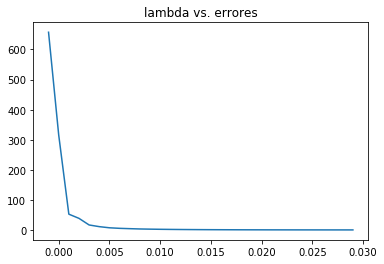

In [40]:
import random as rnd
lam = np.arange(-0.001,0.03,0.001)
error_lambda = []

for l in range(lam.size):
    w= [rnd.random() for i in range(X_train.shape[1]+1)]

    w =regularizado(w,X_train,y_train,lam[l],0.05)
    error_lambda = error_lambda + [np.mean((y_test - (w[0]+ np.dot(X_test,w[1:len(w)])))**2)]
    
plt.plot(lam,error_lambda)
plt.title('lambda vs. errores')

**Minibatch reglinpoli2**

**Para $\lambda=0$**

In [49]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0) 
print(w,error)
print('error:',np.mean((np.dot(w,agregar_unos(X_test).T) - y_test)**2))

[0.48887674265723896, 0.72372687790570234, 0.14393499995232051, 0.53669542641484869, 0.66212106991523356, 0.05542034300420523, 0.18537175203083447, 0.67413740276744794, 0.70159775371964062, 0.66571206637981628, 0.075777930164030102, 0.09983256883257835, 0.091048677726800684, 0.099632450282372609, 0.003103244423346755, 0.015876433758617088, 0.0014039428668355346, 0.034327994244062403, -0.015579303816116639, -0.011665328936312554, 0.065864207250054013, 0.073593101119933405, 0.083474918372955439, 0.031465727868897772, 0.040774169650085235, 0.075951231698459978, -0.0068203873007359698, 0.0039782503088685861, 0.081768015838120087, -0.022238423094431716, -0.025192274245862654, 0.034522307394925456, 0.014923364356144801, 0.005269891005588799, 0.0016960072504690013, 0.078677658261271613, 0.016617286992041791, 0.019201602331830395, 0.034615026678124217] 0.532324120207
error: 0.834355297929


**Para $\lambda=0.001$**

In [50]:
w=[rnd.random() for i in range(X_train.shape[1]+1)]
w,error=wreg(w,X_train,y_train,0.05,0.001) 
print(w,error)
print('error:',np.mean((np.dot(w,agregar_unos(X_test).T) - y_test)**2))

[0.019538600418464541, 0.70258078024833703, -0.14316501332636056, 0.029778419842131365, 0.0073967213838495261, -0.023030508616196668, -0.0096006893742399055, 0.0098082313402763389, -0.02967960840475737, -0.0071894427472268393, 0.022146088487831429, 0.032265486559427778, 0.014424869791942359, 0.027887505405925349, 0.026310078435481384, -0.017625684268061326, -0.015816560948995365, -0.0079027085411127931, -0.0095539174636867386, -0.0085034619689738546, 0.0019681196341808285, 0.054602108698369282, -1.7346578404968882e-05, -0.0043748725683128153, 0.016758619691200335, 0.026504783370954497, -0.026628088240413045, -0.023177675106168163, -0.0062655938181696144, -0.027126013016010548, -0.053450130575225997, -0.00059695077058305598, -0.012322601357635136, 0.0062770540238313273, -0.050289621143949054, 0.030595577223254622, -0.010976308104736729, -0.013159070351502197, -0.0009478125268898935] 0.44474594983
error: 0.727050964038
